<h1>Auto Encoder on MNIST</h1>
<h6>Saket Tiwari</h6>
Date: 03 July 2019

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(x_train, _), (x_test, _)= mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train = x_train.astype('float32')/255
x_test= x_test.astype('float32')/255

In [6]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
print(x_test.shape, x_train.shape)

(10000, 28, 28, 1) (60000, 28, 28, 1)


In [0]:
noise_factor= 0.5
x_train_noisy = x_train + noise_factor * np.random.normal (loc= 0.0 , scale =1.0, size=x_train.shape)
x_test_noisy=x_test+ noise_factor*np.random.normal(loc=0.0, scale =1.0, size = x_test.shape)

In [0]:
x_train_noisy = np.clip(x_train_noisy, 0.,1.)
x_test_noisy = np.clip(x_test_noisy, 0.,1.)

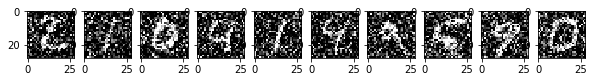

In [9]:
n=10
plt.figure(figsize=(10,2))
for i in range(1, n+1):
  ax= plt.subplot(1,n,i)
  plt.imshow(x_test_noisy[i].reshape(28,28))
  plt.gray()
plt.show()

In [0]:
import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

In [11]:
input_img = Input(shape=(28,28,1))
x=Conv2D(32,(3,3), activation='relu', padding='same')(input_img)
x=MaxPooling2D((2,2), padding='same')(x)

x=Conv2D(32, (3,3), activation = 'relu', padding='same')(x)
encoded=MaxPooling2D((2,2),padding='same')(x)

x=Conv2D(32,(3,3), activation='relu', padding='same')(encoded)
x=UpSampling2D((2,2))(x)

x=Conv2D(32,(3,3), activation='relu', padding='same')(x)
x=UpSampling2D((2,2))(x)

decoded= Conv2D(1,(3,3), activation='sigmoid',padding='same')(x)

autoencoder= Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

W0702 21:45:13.212891 140044181342080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0702 21:45:13.255295 140044181342080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0702 21:45:13.345320 140044181342080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0702 21:45:13.390486 140044181342080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0702 21:45:13.430715 140044181342080 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 32)        0         
__________

In [12]:
autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, shuffle=True, validation_data=(x_test_noisy,x_test))

W0702 21:45:13.858235 140044181342080 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 13s 213us/step - loss: 0.1743 - val_loss: 0.1234
Epoch 2/100
60000/60000 [==============================] - 7s 121us/step - loss: 0.1173 - val_loss: 0.1092
Epoch 3/100
60000/60000 [==============================] - 7s 119us/step - loss: 0.1106 - val_loss: 0.1111
Epoch 4/100
60000/60000 [==============================] - 7s 120us/step - loss: 0.1072 - val_loss: 0.1051
Epoch 5/100
60000/60000 [==============================] - 7s 120us/step - loss: 0.1051 - val_loss: 0.1046
Epoch 6/100
60000/60000 [==============================] - 7s 119us/step - loss: 0.1037 - val_loss: 0.1031
Epoch 7/100
60000/60000 [==============================] - 7s 120us/step - loss: 0.1026 - val_loss: 0.1012
Epoch 8/100
60000/60000 [==============================] - 7s 120us/step - loss: 0.1018 - val_loss: 0.1015
Epoch 9/100
60000/60000 [==============================] - 7s 120us/step - loss: 0.1012 - val

In [0]:
pred=autoencoder.predict(x_test_noisy)

Test Images


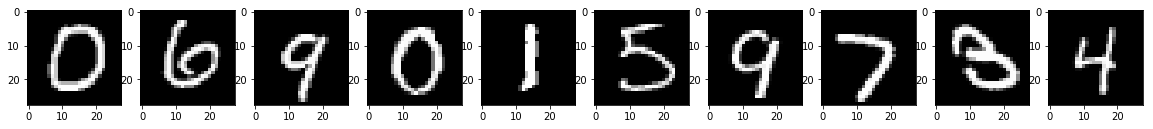

Test Images with Noise


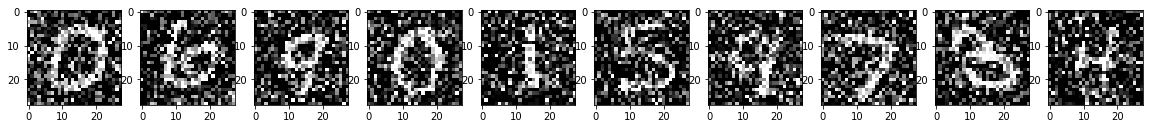

Reconstruction of Noisy Test Images


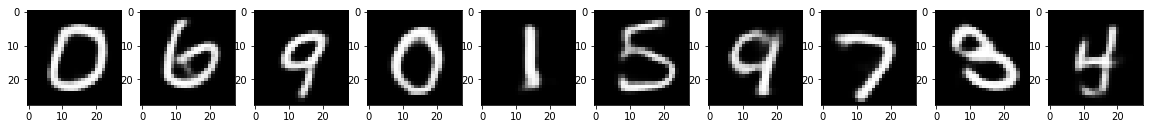

In [23]:
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))
print("Test Images with Noise")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i].reshape(28,28), cmap='gray')
plt.show()    

plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i].reshape(28,28), cmap='gray')  
plt.show()
